In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_excel('aus.xlsx')
dataset.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,1,22.08,11.46,2,4,4.1,1.585,0,0.1,0.2,1.1,2.1,100,1213,0.3
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
def plot_classification ( X_train , X_test , y_train , y_test ,y_pred ) :
  from sklearn.decomposition import PCA
  pca = PCA ( n_components = 2)
  X_train = pca. fit_transform ( X_train )
  X_test = pca. transform ( X_test )
  explained_variance = pca . explained_variance_ratio_
  comparision = pd. DataFrame . join (pd. DataFrame ( y_test ,
  columns =[ 'y_test ']) ,pd. DataFrame ( y_pred , dtype =int , columns =[ 'y_pred ']) )
  comparision [' Comparision '] = comparision . apply ( lambda x: 0 if x [0] == x[1] else 1 , axis =1)
  plotdata = pd. DataFrame . join (pd. DataFrame ( X_test , columns =[ '0','1']) ,comparision [ ' Comparision '])

  #if there are misclassification
  fig3 , ax3 = plt. subplots ( figsize = (14 ,7) )
  ax3 . scatter (x = plotdata [ plotdata . Comparision ==0][ '0'] ,y = plotdata [ plotdata . Comparision == 0][ '1'] , marker = 'o',color = 'red ')
  ax3 . scatter (x = plotdata [ plotdata . Comparision ==1][ '0'] ,y = plotdata [ plotdata . Comparision == 1][ '1'] , marker = 'o',color = 'blue ')
  ax3 . legend ([ 'Classified ',' Misclassified '])
  plt . xlabel ('X1 ')
  plt . ylabel ('X2 ')
  plt . title (' Classification ')
  plt . show ()

In [ ]:
def con_mat_plot( y_test , y_pred ) :
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix ( y_test , y_pred )
  plt.clf ()
  plt.imshow(cm , interpolation = 'nearest', cmap = plt .cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True Result')
  plt.xlabel('Predicted Result')
  tick_marks = np. arange ( len ( classNames ))
  plt.xticks(tick_marks , classNames , rotation =45)
  plt.yticks( tick_marks , classNames )
  s = [[ 'TN','FP'] , ['FN', 'TP']]
  for i in range (2) :
    for j in range (2) :
      plt . text (j,i, str(s[i][j]) +" = "+ str (cm[i][j]) )
  plt . show ()

In [ ]:
def k_fold_cross ( classifier , X_train , y_train ) :
  from sklearn . model_selection import cross_val_score
  accuracies = cross_val_score ( estimator = classifier ,
  X = X_train , y = y_train , cv = 10)
  return accuracies . mean ()

In [ ]:
def data_preprocessing(dataset) :
  listt = dataset.select_dtypes(include =['category', object]).columns
  X = dataset.iloc [: , : -1].values
  y = dataset.iloc [: , -1].values
  for i in range(0 , len(y)) :
    if y[i] == 2:
      y[i] = 0

  listn = np.empty((len(listt ),1))
  for i in range (0 , len(listt )):
    listn [i ,0] = dataset.columns.get_loc(listt[i])

  # Categorial data
  from sklearn.preprocessing import LabelEncoder , OneHotEncoder
  labelencoder_X = LabelEncoder ()
  for i in range (0 , len( listn ) ):
    X[: , int(listn [i ,0]) ] = labelencoder_X .fit_transform (X[: , int (listn [i ,0]) ])
    onehotencoder = OneHotEncoder(categorical_features = [int(listn[i ,0])])

  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

  # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler ()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train ,X_test , y_train , y_test ,X,y

In [ ]:
def choosing_parameters(parameters , classifier , X_train ,y_train ) :
  from sklearn.model_selection import GridSearchCV
  grid_search = GridSearchCV(estimator = classifier ,param_grid = parameters ,scoring = 'accuracy',cv = 10 ,n_jobs = -1)
  grid_search = grid_search.fit(X_train , y_train )
  best_accuracy = grid_search.best_score_
  best_parameters = grid_search.best_params_
  best_para = list(best_parameters.values())
  return best_para

In [ ]:
def plot_decision_boundary (clf , X, Y, X_test , cmap = 'Paired_r') :
  clf . predict ( X_test )
  h = 0.02
  x_min , x_max = X [: ,0]. min () - 10*h, X [: ,0]. max () + 10* h
  y_min , y_max = X [: ,1]. min () - 10*h, X [: ,1]. max () + 10* h
  xx , yy = np. meshgrid (np. arange (x_min , x_max , h) ,
  np. arange (y_min , y_max , h) )
  Z = clf . predict (np.c_[xx. ravel () , yy. ravel () ])
  Z = Z. reshape (xx. shape )
  plt . figure ( figsize =(10 ,10) )
  plt . contourf (xx , yy , Z, cmap =cmap , alpha =0.25)
  plt . contour (xx , yy , Z, colors = 'k', linewidths =0.7)
  plt . ylabel ('x2 ')
  plt . xlabel ('x1 ')
  plt . grid ()
  plt . scatter (X[: ,0] , X[: ,1] , c=Y, cmap =cmap , edgecolors ='k') ;

In [ ]:
def plot_learning_curve ( estimator , title , X, y, ylim =None , cv=None ,n_jobs =None , train_sizes =np.linspace (.1 , 1.0 , 5) ) :
  plt . figure ()
  plt . title ( title )
  if ylim is not None :
    plt . ylim (* ylim )
  plt . xlabel (" Training examples ")
  plt . ylabel (" Score ")
  train_sizes , train_scores , test_scores = learning_curve (estimator , X, y, cv=cv , n_jobs =n_jobs ,train_sizes = train_sizes )
  train_scores_mean = np. mean ( train_scores , axis =1)
  train_scores_std = np.std( train_scores , axis =1)
  test_scores_mean = np. mean ( test_scores , axis =1)
  test_scores_std = np. std ( test_scores , axis =1)
  plt . grid ()
  plt . fill_between ( train_sizes , train_scores_mean - train_scores_std , train_scores_mean + train_scores_std , alpha =0.1 ,color ="r")
  plt . fill_between ( train_sizes , test_scores_mean - test_scores_std ,
  test_scores_mean + test_scores_std , alpha =0.1 , color ="g")
  plt . plot ( train_sizes , train_scores_mean , 'o-', color ="r",
  label =" Training score ")
  plt . plot ( train_sizes , test_scores_mean , 'o-', color = "g",
  label ="Cross - validation score ")
  plt . legend ( loc ="best")
  return plt

In [ ]:
dataset = pd.read_excel('aus.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
X_train ,X_test , y_train , y_test ,X,y = data_preprocessing(dataset)
# print(X[0])

In [ ]:
#Fitting LR to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression ()
classifier_lr .fit( X_train , y_train )

LogisticRegression()

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svc = SVC(kernel='poly',degree=2)
classifier_svc.fit( X_train , y_train )

SVC(degree=2, kernel='poly')

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn . tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier( criterion = 'gini', min_samples_split = 10)
classifier_dt .fit( X_train , y_train )

DecisionTreeClassifier(min_samples_split=10)

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn . ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier ( n_estimators = 10 , criterion = 'entropy', min_samples_split = 2)
classifier_rf.fit( X_train , y_train )

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred_lr = classifier_lr.predict( X_test )
y_pred_svc = classifier_svc.predict(X_test )
y_pred_dt = classifier_dt.predict( X_test )
y_pred_rf = classifier_rf.predict( X_test )

[ 0.72256449 -0.17328246 -0.81736442 -1.79064508  0.19349588 -0.33275014
 -0.64205183 -1.04644973 -0.88823479 -0.55494112 -0.91804649  0.24714047
  0.33049667 -0.1998209 ]
Confusion Matrix for Logistic Regression 


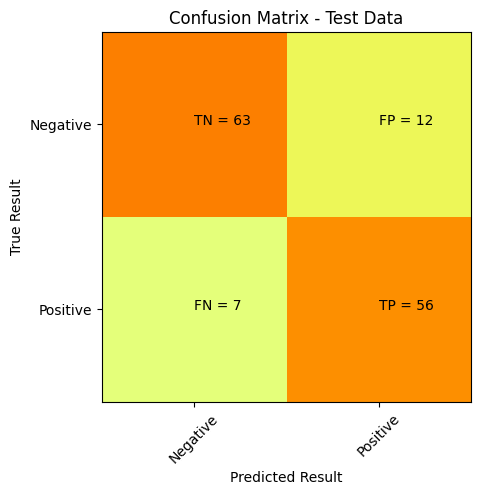

In [ ]:
print(X_test[0])
print ('Confusion Matrix for Logistic Regression ')
con_mat_plot ( y_test , y_pred_lr )

Confusion Matrix for SVM


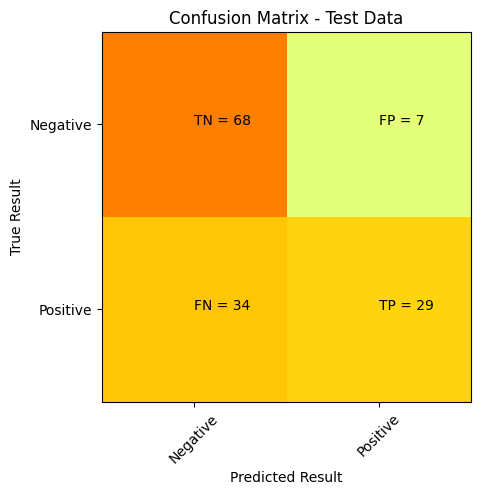

In [ ]:
print('Confusion Matrix for SVM')
con_mat_plot(y_test,y_pred_svc)

Confusion Matrix for Decision Tree 


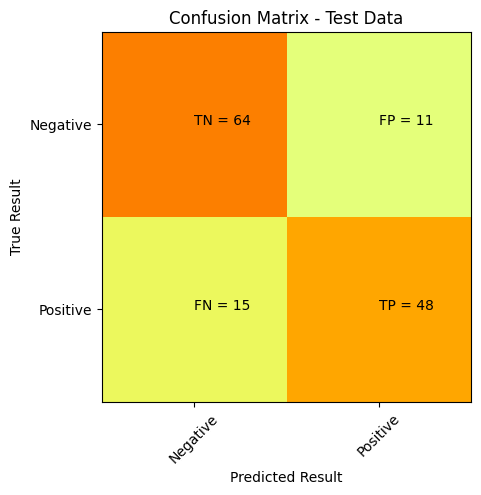

In [ ]:
print ('Confusion Matrix for Decision Tree ')
con_mat_plot ( y_test , y_pred_dt )

Confusion Matrix for Random Forest 


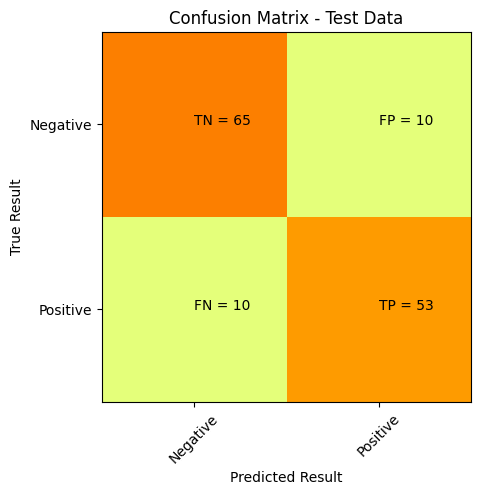

In [ ]:
print ('Confusion Matrix for Random Forest ')
con_mat_plot ( y_test , y_pred_rf )

In [ ]:
accuracies_lr = k_fold_cross ( classifier_lr , X_train , y_train )
accuracies_svc = k_fold_cross(classifier_svc , X_train , y_train )
accuracies_dt = k_fold_cross(classifier_dt , X_train , y_train )
accuracies_rf = k_fold_cross(classifier_rf , X_train , y_train )

In [ ]:
print ('LR: Mean Accuracy before tuning ', accuracies_lr .mean () *100.)

LR: Mean Accuracy before tuning  86.21428571428572


In [ ]:
print ('SVC : Mean Accuracy before tuning ', accuracies_svc.mean () *100.)


SVC : Mean Accuracy before tuning  70.0551948051948


In [ ]:
print ('Decision Tree : Mean Accuracy before tuning ',accuracies_dt . mean () *100.)


Decision Tree : Mean Accuracy before tuning  84.57792207792207


In [ ]:
print ('Random Forest : Mean Accuracy before tuning ',accuracies_rf . mean () *100.)

Random Forest : Mean Accuracy before tuning  85.2987012987013


In [ ]:
# Best parameters for Logistic Regression
parameters_lr = [{ 'C': [1 , 5 , 10] , 'tol': [1e-4 ,1e-5 ,1e-6 ,1e-10]}]
best_para_lr = choosing_parameters ( parameters_lr , classifier_lr , X_train , y_train )
print(best_para_lr)
C_lr = best_para_lr [0]
tole_lr = best_para_lr [1]

[1, 0.0001]


In [ ]:
# Best parameters for SVM
parameters_svc = [{ 'kernel': ['rbf','poly'] , 'degree': [1 , 2 , 3 , 4, 5 , 6 , 7]}]
best_para_svc = choosing_parameters(parameters_svc , classifier_svc , X_train , y_train )
ker_svc = best_para_svc[1]
deg_svc = best_para_svc[0]
print(best_para_svc)

[1, 'rbf']


In [ ]:
# Best parameters for Decision Tree
parameters_dt = [{ 'criterion': ['gini','entropy'] , 'min_samples_split': [2 ,4 ,6 ,8 ,10 ,15]}]
best_para_dt = choosing_parameters( parameters_dt , classifier_dt , X_train , y_train )
criteria_dt = best_para_dt [0]
min_split_dt = best_para_dt [1]
print(best_para_dt)

['entropy', 10]


In [ ]:
# Best parameters for Random Forest
parameters_rf = [{ 'criterion': ['gini','entropy'] ,'min_samples_split': [2 ,5 , 10 , 15 , 20] ,
                  'n_estimators': [10 , 20 , 30 , 40 , 50 ,100 ,150]}]
best_para_rf = choosing_parameters ( parameters_rf ,classifier_rf , X_train , y_train )
print(best_para_rf)
min_samp_spl_rf = best_para_rf [1]
n_est_rf = best_para_rf [2]
criterion_rf = best_para_rf [0]

['gini', 15, 30]


In [ ]:
# Logistic Regression
classifier_lr = LogisticRegression (C = int( C_lr ) , tol = float ( tole_lr ) )
classifier_lr .fit( X_train , y_train )

LogisticRegression(C=1)

In [ ]:
# SVM
classifier_svc = SVC(kernel = str(ker_svc),degree=int( deg_svc ) )
classifier_svc . fit ( X_train , y_train )

SVC(degree=1)

In [ ]:

# Decision Tree Classification
classifier_dt = DecisionTreeClassifier(criterion = str (criteria_dt ) , min_samples_split = int( min_split_dt ) )
classifier_dt .fit( X_train , y_train )

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [ ]:

# Random Forest Classification
classifier_rf = RandomForestClassifier ( n_estimators = int ( n_est_rf ) , criterion = str( criterion_rf ) , min_samples_split = int (min_samp_spl_rf ))
classifier_rf .fit( X_train , y_train )

RandomForestClassifier(min_samples_split=15, n_estimators=30)

In [ ]:
y_pred_lr = classifier_lr . predict ( X_test )
y_pred_svc = classifier_svc . predict ( X_test )
y_pred_dt = classifier_dt . predict ( X_test )
y_pred_rf = classifier_rf . predict ( X_test )

Confusion Matrix for Logistic Regression 


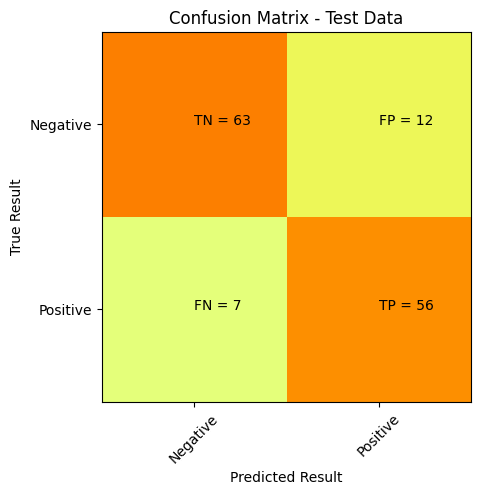

In [ ]:
print ('Confusion Matrix for Logistic Regression ')
con_mat_plot ( y_test , y_pred_lr )

Confusion Matrix for SVM 


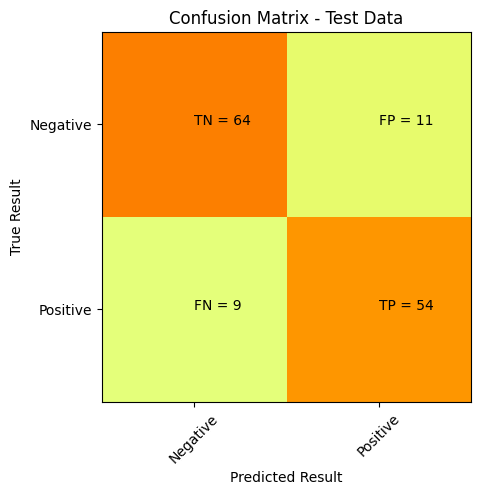

In [ ]:
print ('Confusion Matrix for SVM ')
con_mat_plot ( y_test , y_pred_svc )

Confusion Matrix for Decision Tree 


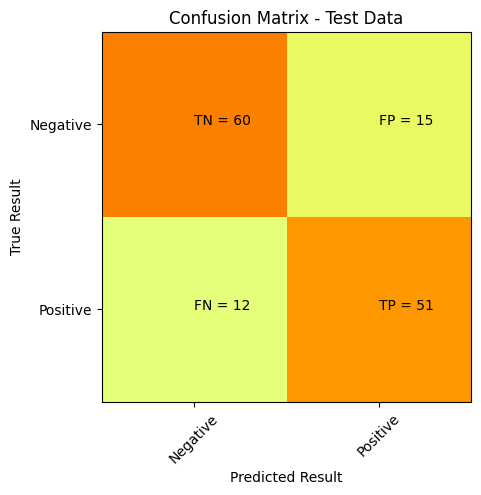

In [ ]:
print ('Confusion Matrix for Decision Tree ')
con_mat_plot ( y_test , y_pred_dt )

Confusion Matrix for Random Forest 


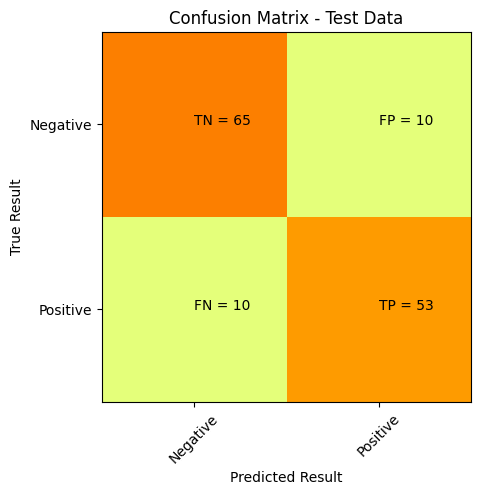

In [ ]:
print ('Confusion Matrix for Random Forest ')
con_mat_plot ( y_test , y_pred_rf )

In [ ]:
accuracies_lr = k_fold_cross ( classifier_lr , X_train , y_train )
accuracies_svc = k_fold_cross ( classifier_svc , X_train , y_train )
accuracies_dt = k_fold_cross ( classifier_dt , X_train , y_train )
accuracies_rf = k_fold_cross ( classifier_rf , X_train , y_train )

In [ ]:
print ('LR : Mean Accuract after tuning ' , accuracies_lr.mean() * 100.)
print ('SVM : Mean Accuracy after tuning ', accuracies_svc .mean () *100.)
print ('Decision Tree : Mean Accuracy after tuning ',accuracies_dt . mean () *100.)
print ('Random Forest : Mean Accuracy after tuning ',accuracies_rf . mean () *100.)

LR : Mean Accuract after tuning  86.21428571428572
SVM : Mean Accuracy after tuning  86.75649350649351
Decision Tree : Mean Accuracy after tuning  85.47727272727272
Random Forest : Mean Accuracy after tuning  87.48051948051948


In [ ]:
from sklearn . decomposition import PCA
pca = PCA ( n_components = 2)
X_train = pca. fit_transform ( X_train )
X_test = pca. transform ( X_test )

In [ ]:
# Logistic Regression
classifier_lr = LogisticRegression (C = int( C_lr ) , tol = float ( tole_lr ) )
classifier_lr .fit( X_train , y_train )

LogisticRegression(C=1)

In [ ]:
# SVM Classification
classifier_svc = SVC ( kernel = str ( ker_svc ) , degree = int( deg_svc ) )
classifier_svc . fit ( X_train , y_train )

SVC(degree=1)

In [ ]:
# Decision Tree Classification
classifier_dt = DecisionTreeClassifier ( criterion = str (criteria_dt ) , min_samples_split = int( min_split_dt ) )
classifier_dt .fit( X_train , y_train )

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [ ]:
# Random Forest Classification
classifier_rf = RandomForestClassifier ( n_estimators = int ( n_est_rf ) , criterion = str( criterion_rf ) ,
min_samples_split = int (min_samp_spl_rf ))
classifier_rf .fit( X_train , y_train )

RandomForestClassifier(min_samples_split=15, n_estimators=30)

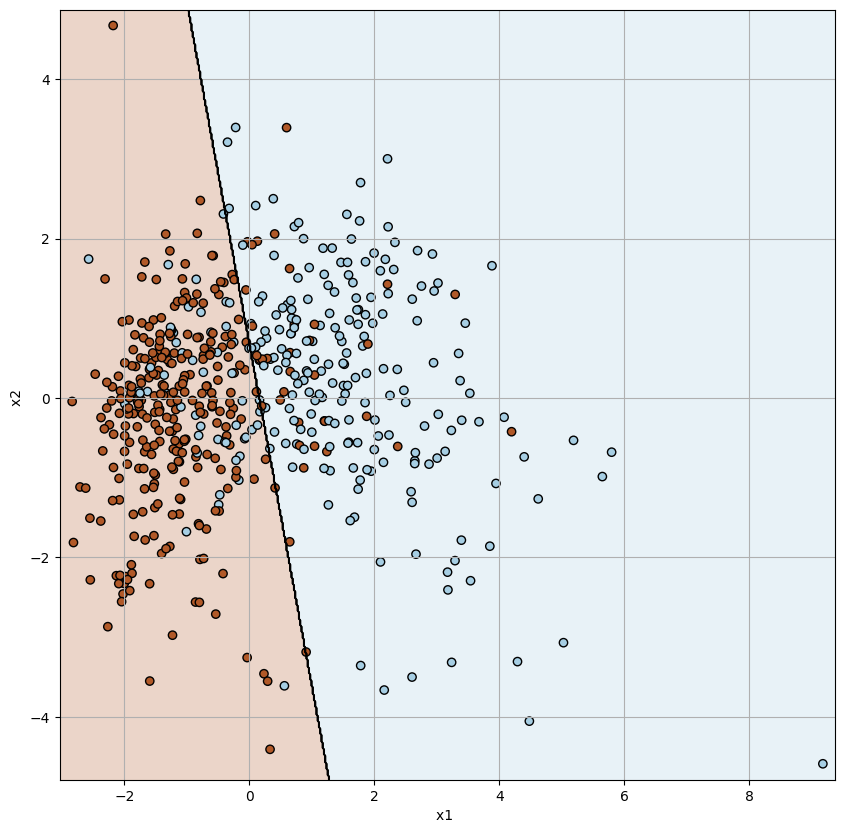

In [ ]:
plot_decision_boundary ( classifier_lr ,X_train , y_train , X_test , cmap ='Paired_r')

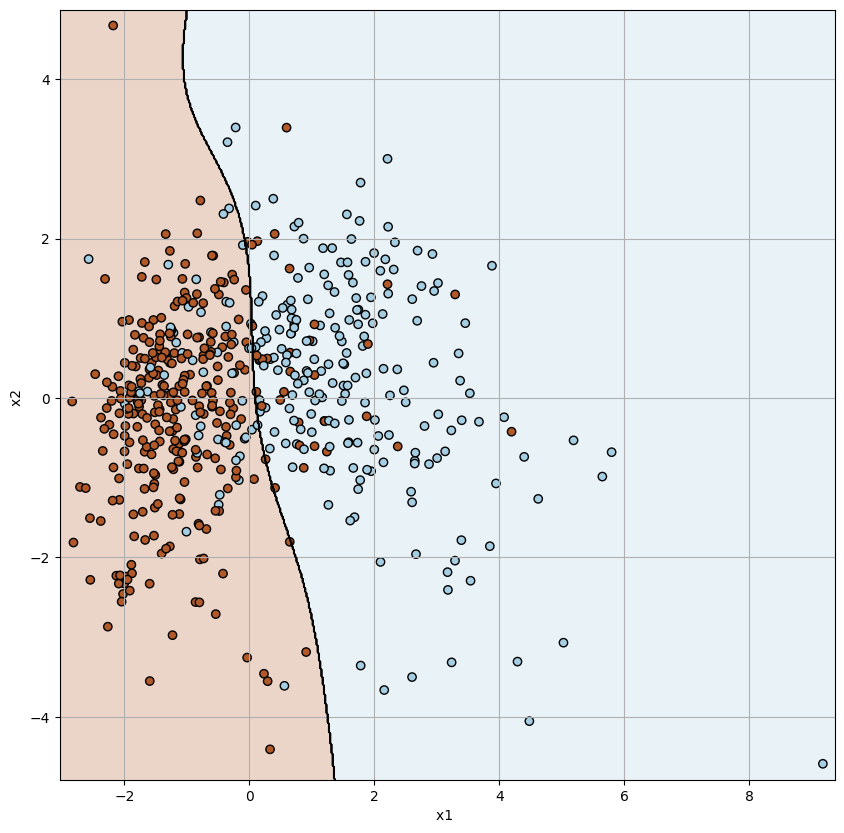

In [ ]:
plot_decision_boundary ( classifier_svc ,X_train , y_train ,X_test , cmap ='Paired_r')


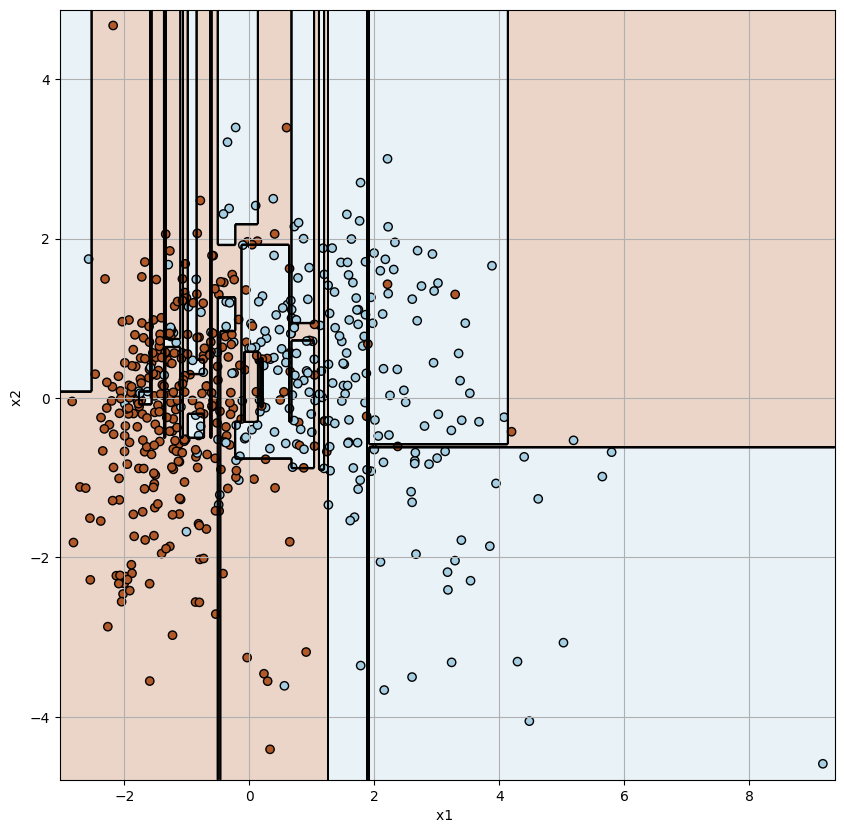

In [ ]:
plot_decision_boundary ( classifier_dt ,X_train , y_train , X_test , cmap ='Paired_r')

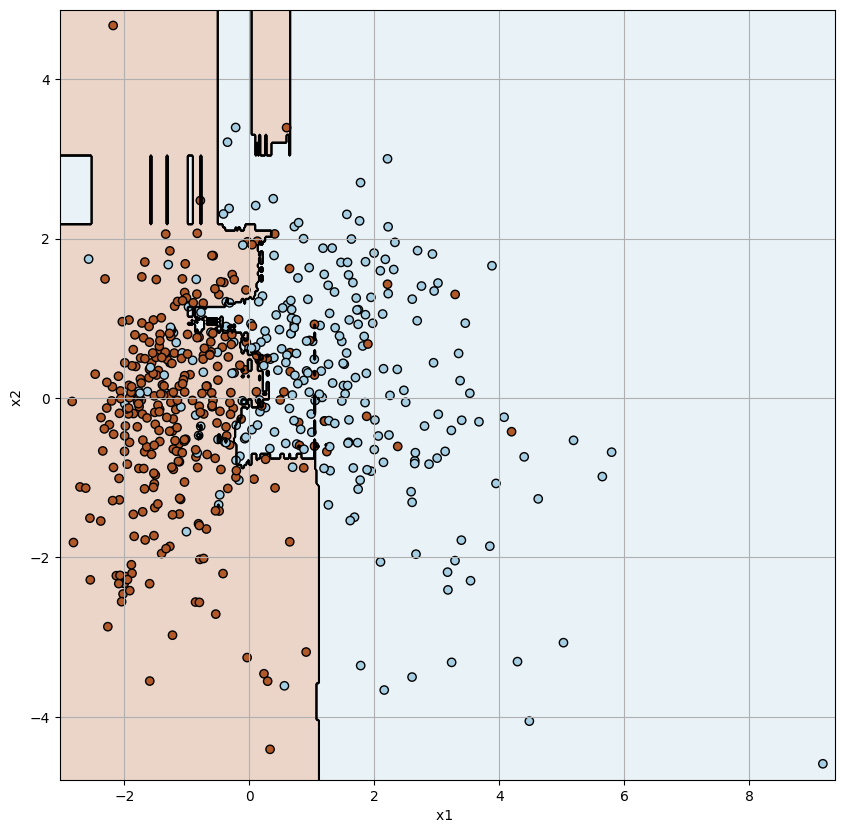

In [ ]:
plot_decision_boundary ( classifier_rf ,X_train , y_train , X_test , cmap ='Paired_r')

In [ ]:
from sklearn . model_selection import ShuffleSplit
cv = ShuffleSplit ( test_size =0.2 , random_state = 0)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

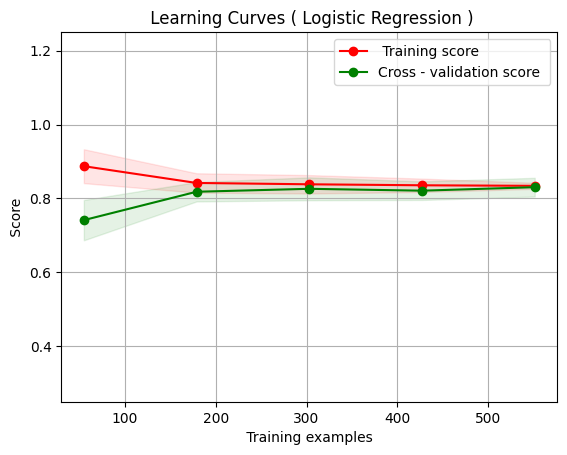

In [ ]:
title = " Learning Curves ( Logistic Regression )"
estimator = classifier_lr
plot_learning_curve ( estimator , title , X, y, ylim =(0.25 , 1.25) , cv=cv , n_jobs =4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

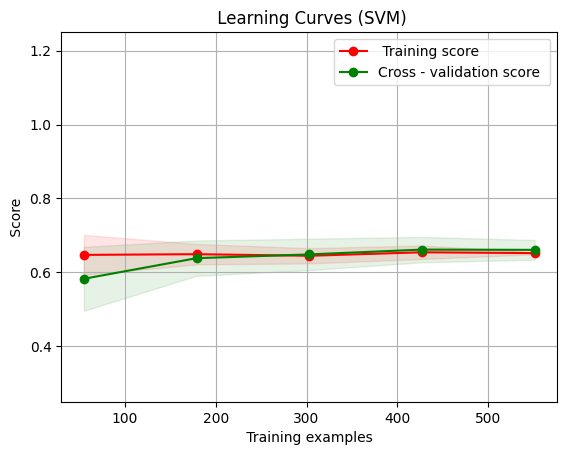

In [ ]:
title = " Learning Curves (SVM)"
estimator = classifier_svc
plot_learning_curve(estimator , title , X, y, (0.25 , 1.25) , cv=cv , n_jobs =4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

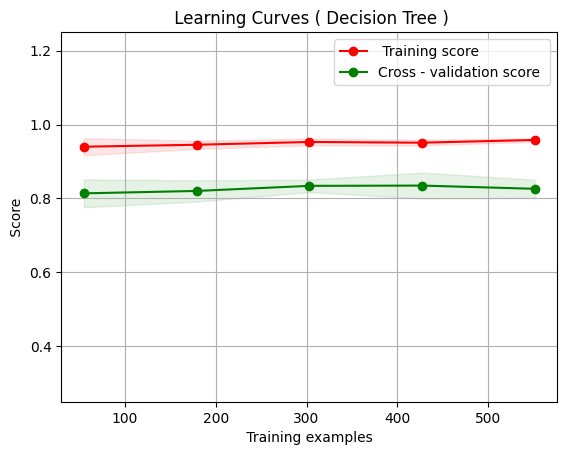

In [ ]:
title = " Learning Curves ( Decision Tree )"
estimator = classifier_dt
plot_learning_curve ( estimator , title , X, y, (0.25 , 1.25) , cv=cv , n_jobs =4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

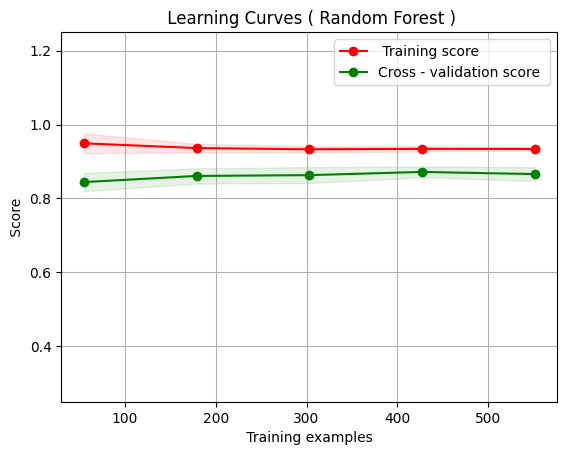

In [ ]:

title = " Learning Curves ( Random Forest )"
estimator = classifier_rf
plot_learning_curve ( estimator , title , X, y, (0.25 , 1.25) , cv=cv , n_jobs =4)